# <font color='green'>  Decision Tree:</font>

- **Decision Tree** are Primarily  used for making decisions or predictions based on a series of questions and answers.

- It belongs to the class of supervised learning algorithms

- which is utilized for both **classification** (e.g., spam vs. not spam in emails) and **regression tasks** (e.g., predicting house prices based on features like size and location). 

**Attribute (Features) Selection Measures.**

**1. Gini impurity**

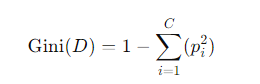

- It calculates the probability of misclassifying a randomly chosen element from the dataset.

- Ranges from 0 (pure class) to 0.5 (maximum impurity for binary classification).

**2.Entropy**

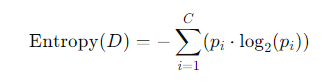

- It measures the amount of disorder or uncertainty in the dataset.

- Ranges from 0 (pure class) to log2  where  C is the number of classes.

### Problem Statement

- The problem is to predict the safety of the car. In this project, I build a Decision Tree Classifier to predict the safety of the car. 

- I implement Decision Tree Classification with Python and Scikit-Learn.

## Import Libraries and Dataset:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
data=pd.read_csv("C:/Users/USER/Desktop/M.L Data Set/car_evaluation.csv")
data.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


### Exploratory Data Analysis (EDA):

In [3]:
data.shape

(1727, 7)

We can see that our dataset does not have proper column names. the columns are labeled as 0, 1, 2, and so on. We should assign appropriate names to the columns.

In [4]:
# Rename column names

col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
data.columns= col_names

In [5]:
# summary of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1727 non-null   object
 1   maint     1727 non-null   object
 2   doors     1727 non-null   object
 3   persons   1727 non-null   object
 4   lug_boot  1727 non-null   object
 5   safety    1727 non-null   object
 6   class     1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [6]:
data.isna()

,buying,maint,doors,persons,lug_boot,safety,class
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1722,False,False,False,False,False,False,False
1723,False,False,False,False,False,False,False
1724,False,False,False,False,False,False,False
1725,False,False,False,False,False,False,False


In [7]:
data.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

we dont have null values.

In [8]:
data.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
class       object
dtype: object

There are types of variables that are categorical. Now let's look at the value_counts of these values.

In [9]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

for col in col_names:
    
    print(data[col].value_counts()) 

low      432
med      432
high     432
vhigh    431
Name: buying, dtype: int64
low      432
med      432
high     432
vhigh    431
Name: maint, dtype: int64
5more    432
3        432
4        432
2        431
Name: doors, dtype: int64
more    576
4       576
2       575
Name: persons, dtype: int64
med      576
big      576
small    575
Name: lug_boot, dtype: int64
med     576
high    576
low     575
Name: safety, dtype: int64
unacc    1209
acc       384
good       69
vgood      65
Name: class, dtype: int64


- The dataset contains 7 variables, all of which are of categorical data type.

- The variable names are buying, maint, doors, persons, lug_boot, safety, and class, 

- class is the target variable ( dependent). 





In [10]:
#The class target variable is ordinal in nature.

data['class'].value_counts()

unacc    1209
acc       384
good       69
vgood      65
Name: class, dtype: int64

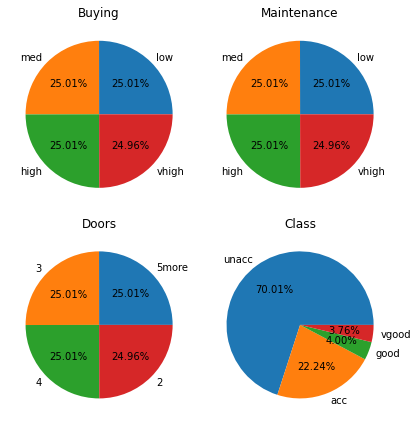

In [11]:

# Set up the subplots
fig, axes = plt.subplots(2, 2, figsize=(6, 6))  # Create a 2x2 grid of subplots

# Plot each pie chart
axes[0, 0].pie(data["buying"].value_counts(), labels=data["buying"].value_counts().index, autopct="%.2f%%")
axes[0, 0].set_title('Buying')

axes[0, 1].pie(data["maint"].value_counts(), labels=data["maint"].value_counts().index, autopct="%.2f%%")
axes[0, 1].set_title('Maintenance')

axes[1, 0].pie(data["doors"].value_counts(), labels=data["doors"].value_counts().index, autopct="%.2f%%")
axes[1, 0].set_title('Doors')

axes[1, 1].pie(data["class"].value_counts(), labels=data["class"].value_counts().index, autopct="%.2f%%")
axes[1, 1].set_title('Class')

# Adjust layout
plt.tight_layout()
plt.show()

### Feature Engineering:

In [12]:
x = data.drop(['class'], axis=1)
y = data['class']

convert categorical columns into numerical format using ordinal encoding

In [15]:
import category_encoders as ce
encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])
x = encoder.fit_transform(x)
x.head()

,buying,maint,doors,persons,lug_boot,safety
0,1,1,1,1,1,1
1,1,1,1,1,1,2
2,1,1,1,1,2,3
3,1,1,1,1,2,1
4,1,1,1,1,2,2


**Split data into  training and test set**

In [16]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 42)

In [17]:
# checking the shape of train and test 

x_train.shape,x_test.shape 

((1208, 6), (519, 6))

In [18]:
# checking the shape of train and test 

y_train.shape,y_test.shape 

((1208,), (519,))

In [19]:
x_train.head()

,buying,maint,doors,persons,lug_boot,safety
1177,3,3,4,2,3,2
585,2,2,2,3,1,1
1551,4,3,2,2,2,1
727,2,3,3,3,3,2
707,2,3,3,1,3,3


In [20]:
x_test.head()

,buying,maint,doors,persons,lug_boot,safety
599,2,2,3,1,3,3
932,3,1,3,2,3,3
628,2,2,4,1,3,2
1497,4,2,4,2,2,1
1262,3,4,3,3,2,3


### Decision Tree Criterion with gini index

In [21]:
# import DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier

In [22]:
# instantiate the DecisionTreeClassifier model with criterion gini index

class_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)


# fit the model
class_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [23]:
y_pred_gini = class_gini.predict(x_test)

**Check accuracy**

In [24]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with  gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with  gini index: 0.8015


In [25]:
y_pred_train_gini = class_gini.predict(x_train)

print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Training-set accuracy score: 0.7873


**Compare the train-set and test-set accuracy**

In [26]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(class_gini.score(x_train, y_train)))

print('Test set score: {:.4f}'.format(class_gini.score(x_test, y_test)))

Training set score: 0.7873
Test set score: 0.8015


The training set accuracy score =0.7873 and the test set accuracy= 0.8015. These two values are quite close, indicating that there is no sign of overfitting.

### Decision Tree Classifier with criterion entropy:

In [27]:
# DecisionTreeClassifier model with criterion entropy

class_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)


# fit the model
class_en.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [28]:
y_pred_en = class_en.predict(x_test)

**accuracy score**

In [29]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

Model accuracy score with criterion entropy: 0.8015


In [30]:
y_pred_train_en = class_en.predict(x_train)

y_pred_train_en

array(['acc', 'unacc', 'acc', ..., 'unacc', 'unacc', 'acc'], dtype=object)

In [31]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_en)))

Training-set accuracy score: 0.7873


**Compare the train-set and test-set accuracy**

In [32]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(class_en.score(x_train, y_train)))

print('Test set score: {:.4f}'.format(class_en.score(x_test, y_test)))

Training set score: 0.7873
Test set score: 0.8015


The training set accuracy score =0.7873 and the test set accuracy= 0.8015. These two values are quite close, indicating that there is no sign of overfitting.

- The decision tree classifier shows good performance, with acceptable accuracy on both the training and test sets, indicating that the model is well-suited for the task."

## Confusion Matrix:

A confusion matrix helps you understand how well our classification model is performing by showing the number of correct and incorrect predictions for each class.

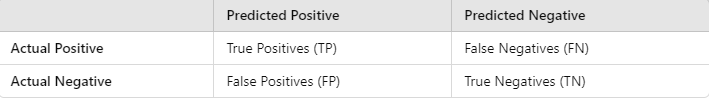

**1.True Positives (TP):**  Correctly predicted as the positive class.

-  Example:Predicting that a patient has a disease when they actually have it.

**2.True Negatives (TN):**  Correctly predicted as the negative class.
-  Example: Predicting that a patient does not have a disease when they truly do not have it.

**3.False Positives (FP)(Type I Error):** Incorrectly predicted as the positive class.

- Example: Predicting that a patient has a disease when they actually do not (a "false alarm").

**4.False Negatives (FN) (Type II Error):** Incorrectly predicted as the negative class.
- Example: Predicting that a patient does not have a disease when they actually do (missing a diagnosis).

In [33]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_en)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[ 66   0  52   0]
 [ 17   0   0   0]
 [ 11   0 350   0]
 [ 23   0   0   0]]


**Classification Report**

In [34]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_en))

              precision    recall  f1-score   support

         acc       0.56      0.56      0.56       118
        good       0.00      0.00      0.00        17
       unacc       0.87      0.97      0.92       361
       vgood       0.00      0.00      0.00        23

    accuracy                           0.80       519
   macro avg       0.36      0.38      0.37       519
weighted avg       0.73      0.80      0.77       519



##  conclusion

- I created a Decision Tree Classifier to predict car safety. I built two models: one using the Gini index and another using entropy. Both models performed well, achieving an accuracy of **0.8015.**

- In the model using the Gini index, the training accuracy was **0.7873** and the test accuracy was **0.8015* These scores are close to each other, which suggests that the model is not overfitting.

- For the model using entropy, the training accuracy was also **0.7873,** with a test accuracy of **0.8015.** The scores are the same as those from the Gini model, indicating that there is still no overfitting. This could be due to the small size of the dataset.

- The confusion matrix and classification report show that the model is performing very well overall.


**Visualize decision-trees**

[Text(334.79999999999995, 380.52, 'X[5] <= 2.5\nentropy = 1.203\nsamples = 1208\nvalue = [266, 52, 848, 42]'),
 Text(223.2, 271.8, 'X[3] <= 1.5\nentropy = 1.484\nsamples = 798\nvalue = [266, 52, 438, 42]'),
 Text(111.6, 163.07999999999998, 'entropy = 0.0\nsamples = 251\nvalue = [0, 0, 251, 0]'),
 Text(334.79999999999995, 163.07999999999998, 'X[0] <= 2.5\nentropy = 1.642\nsamples = 547\nvalue = [266, 52, 187, 42]'),
 Text(223.2, 54.360000000000014, 'entropy = 0.995\nsamples = 280\nvalue = [128, 0, 152, 0]'),
 Text(446.4, 54.360000000000014, 'entropy = 1.756\nsamples = 267\nvalue = [138, 52, 35, 42]'),
 Text(446.4, 271.8, 'entropy = 0.0\nsamples = 410\nvalue = [0, 0, 410, 0]')]

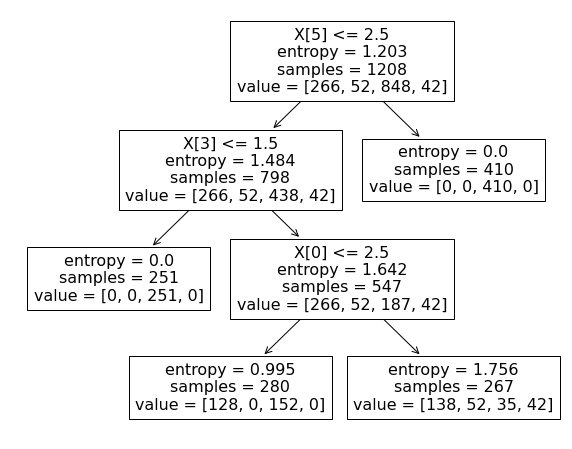

In [35]:
plt.figure(figsize=(10,8))
from sklearn import tree
tree.plot_tree(class_en.fit(x_train, y_train)) 